## Phase 1 Project Submission

Please fill out:
* Student name: Matt LeGro
* Student pace: self paced / part time / (full time)
* Scheduled project review date/time: 
* Instructor name: Abhineet (Reviewing Instructor: )


In [1]:
import os
import pandas as pd
import numpy as np
import tmdbsimple as tmdb
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_collection = pd.read_csv('./dataFiles/movie_collection.csv')

In [3]:
movie_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tconst            2373 non-null   object 
 1   Title             2373 non-null   object 
 2   Genres            2373 non-null   object 
 3   runtime_minutes   2373 non-null   int64  
 4   vote_average      2373 non-null   float64
 5   vote_count        2373 non-null   int64  
 6   budget_est        2373 non-null   float64
 7   worldwide_gross   2373 non-null   float64
 8   release_week_day  2373 non-null   int64  
 9   release_day       2373 non-null   int64  
 10  release_month     2373 non-null   int64  
 11  release_year      2373 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 222.6+ KB


In [4]:
movie_collection.describe()

,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year
count,2373.000000,2373.000000,2.373000e+03,2.373000e+03,2.373000e+03,2373.000000,2373.000000,2373.000000,2373.000000
mean,108.500211,6.382529,7.379590e+04,3.580101e+07,1.128888e+08,3.637590,15.781290,6.933418,2013.137800
std,20.781843,1.031946,1.438744e+05,4.941197e+07,2.176952e+08,0.982633,8.631179,3.421209,5.687845
min,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000,1.000000,1930.000000
25%,95.000000,5.800000,3.280000e+02,5.400000e+06,4.423508e+06,4.000000,9.000000,4.000000,2011.000000
50%,106.000000,6.400000,8.665000e+03,1.700000e+07,3.029494e+07,4.000000,16.000000,7.000000,2014.000000
75%,119.000000,7.093148,8.690500e+04,4.000000e+07,1.146292e+08,4.000000,23.000000,10.000000,2016.000000
max,339.000000,10.000000,1.863252e+06,3.953000e+08,2.787965e+09,6.000000,31.000000,12.000000,2019.000000


Okay, from here I am seeing: movies tend to be released more during the later months, we don't have data for years after 2019, there may be a record with one vote for a rating of zero. Similarly there is a movie with a budget of 1 dollar. Release day throughout the month seems fairly evenly distributed.

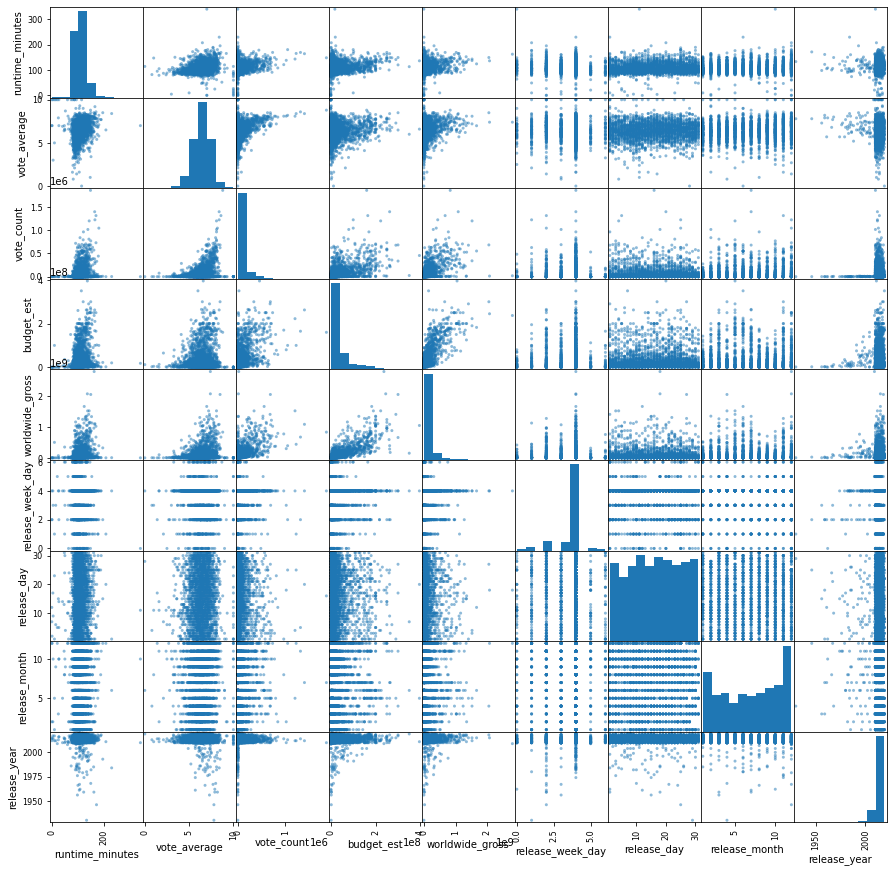

In [5]:
pd.plotting.scatter_matrix(movie_collection,figsize =(15,15));

Noteable Features: Most of the data is from after 2000, maybe even after 2010, depending on the binning here. Worlwide Gross seems to track slightly with budget, which is reasonable. Same with vote_average, though it is hard to quantify how you're movie will get voted on before it is released. Of course there may be some indirect relationships we can make. Slight improvements on vote_average with increasing movie length, for example. There may be something of a rightward skew with respect to worldwide_gross and runtime as well, but it could be because with increased runtime comes increased budget and increased gross. Another interesting feature is that there are obvious months and days on which high-grossing movies are not released, though based on voter ratings, these movies aren't necessarily worse than their counterparts. Let's quickly add a ROI column to see if there are better defined relationships there.

In [6]:
movie_collection['ROI_percent'] = (
    movie_collection.worldwide_gross - movie_collection.budget_est) / movie_collection.budget_est * 100

In [7]:
movie_collection.head()

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent
0,tt0892769,How to Train Your Dragon,"['Fantasy', 'Adventure', 'Animation', 'Family']",98,8.095082,618909,165000000.0,4.948749e+08,4,26,3,2010,199.924167
1,tt1228705,Iron Man 2,"['Adventure', 'Action', 'Science Fiction']",124,6.996308,670058,185000000.0,6.225449e+08,4,7,5,2010,236.510735
2,tt1375666,Inception,"['Action', 'Science Fiction', 'Adventure']",148,8.794046,1863252,160000000.0,8.305287e+08,4,16,7,2010,419.080439
3,tt0814255,Percy Jackson & the Olympians: The Lightning T...,"['Adventure', 'Fantasy', 'Family']",118,5.904995,169337,95000000.0,2.247740e+08,3,11,2,2010,136.604254
4,tt0435761,Toy Story 3,"['Animation', 'Family', 'Comedy']",103,8.292754,690558,200000000.0,1.067925e+09,3,17,6,2010,433.962306


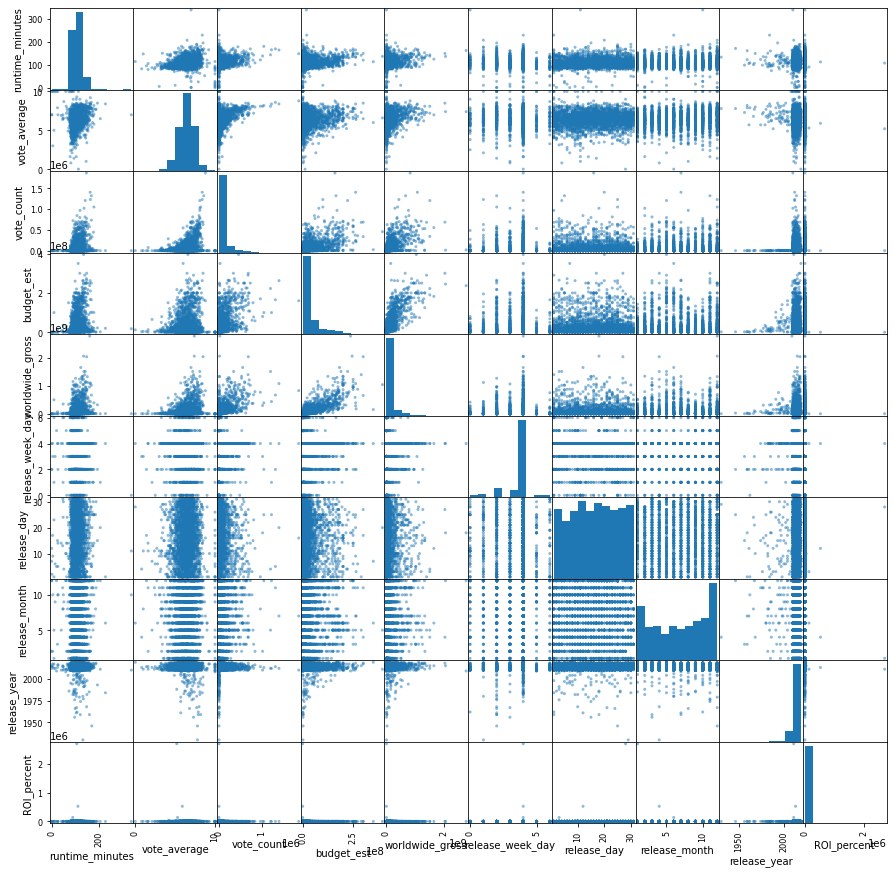

In [8]:
pd.plotting.scatter_matrix(movie_collection,figsize =(15,15));

Okay, there are some ROI outliers obscuring the data, lets see what they are.

In [9]:
movie_collection.sort_values(by='ROI_percent', ascending = False).head(50)

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent
1316,tt0893412,From Prada to Nada,"['Comedy', 'Drama', 'Romance']",107,5.200000,163,93.0,2500000.0,4,28,1,2011,2.688072e+06
1502,tt1595656,To the Wonder,"['Drama', 'Romance']",112,5.900000,266,112.0,587615.0,4,12,4,2013,5.245562e+05
1337,tt1436559,"Love, Wedding, Marriage","['Comedy', 'Romance']",90,5.300000,117,1.0,1378.0,4,3,6,2011,1.377000e+05
750,tt2309260,The Gallows,"['Horror', 'Thriller']",84,4.219320,18354,100000.0,42160442.0,4,10,7,2015,4.206044e+04
1466,tt2389344,The Mistress,"['Romance', 'Drama']",125,6.400000,7,22361.0,5876918.0,4,21,9,2012,2.618200e+04
1594,tt2133234,Haunted,['Horror'],93,5.100000,5,5000.0,750000.0,6,31,3,2013,1.490000e+04
2128,tt7961060,Dragon Ball Super: Broly,"['Action', 'Animation', 'Fantasy', 'Adventure'...",101,7.400000,721,1000000.0,125002821.0,2,16,1,2019,1.240028e+04
394,tt1560985,The Devil Inside,"['Thriller', 'Horror']",83,4.206492,33963,1000000.0,101758990.0,4,6,1,2012,1.007590e+04
1193,tt1584016,Catfish,['Documentary'],87,6.800000,284,30000.0,3045943.0,4,17,9,2010,1.005314e+04
1565,tt2459022,Lost in Thailand,"['Comedy', 'Adventure', 'Drama']",105,6.500000,36,2200000.0,208000000.0,1,5,2,2013,9.354545e+03


Looking at the top 50 best performing by ROI percent, there are mostly legitimate movies / data, which is encouraging. The top three are definitely bad values; a quick google search can verify that. We'll have to do some plotting while excluding outliers or using specific budget ranges. Since I know there are some bad actors in this head, I'll remove them. 

In [10]:
remove_tconsts = ['tt0893412','tt1595656','tt1436559']
remove_indexes = movie_collection[ movie_collection['tconst'].isin(remove_tconsts)].index
movie_collection = movie_collection.drop(remove_indexes)
movie_collection.sort_values(by='ROI_percent', ascending = False).head(50)

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent
750,tt2309260,The Gallows,"['Horror', 'Thriller']",84,4.219320,18354,100000.0,42160442.0,4,10,7,2015,42060.442000
1466,tt2389344,The Mistress,"['Romance', 'Drama']",125,6.400000,7,22361.0,5876918.0,4,21,9,2012,26181.999911
1594,tt2133234,Haunted,['Horror'],93,5.100000,5,5000.0,750000.0,6,31,3,2013,14900.000000
2128,tt7961060,Dragon Ball Super: Broly,"['Action', 'Animation', 'Fantasy', 'Adventure'...",101,7.400000,721,1000000.0,125002821.0,2,16,1,2019,12400.282100
394,tt1560985,The Devil Inside,"['Thriller', 'Horror']",83,4.206492,33963,1000000.0,101758990.0,4,6,1,2012,10075.899000
1193,tt1584016,Catfish,['Documentary'],87,6.800000,284,30000.0,3045943.0,4,17,9,2010,10053.143333
1565,tt2459022,Lost in Thailand,"['Comedy', 'Adventure', 'Drama']",105,6.500000,36,2200000.0,208000000.0,1,5,2,2013,9354.545455
1664,tt2235779,The Quiet Ones,['Horror'],98,5.000000,398,200000.0,17834867.0,4,25,4,2014,8817.433500
1598,tt0387564,Saw,"['Horror', 'Mystery', 'Crime']",103,7.400000,4795,1200000.0,103911669.0,4,29,10,2004,8559.305750
1706,tt3001638,Mary Kom,"['Action', 'Drama', 'History']",122,7.200000,49,224056.0,15536328.0,5,8,11,2014,6834.127182


A lot of these will still be outliers, but it getting rid of those obviously wrong ones was good.

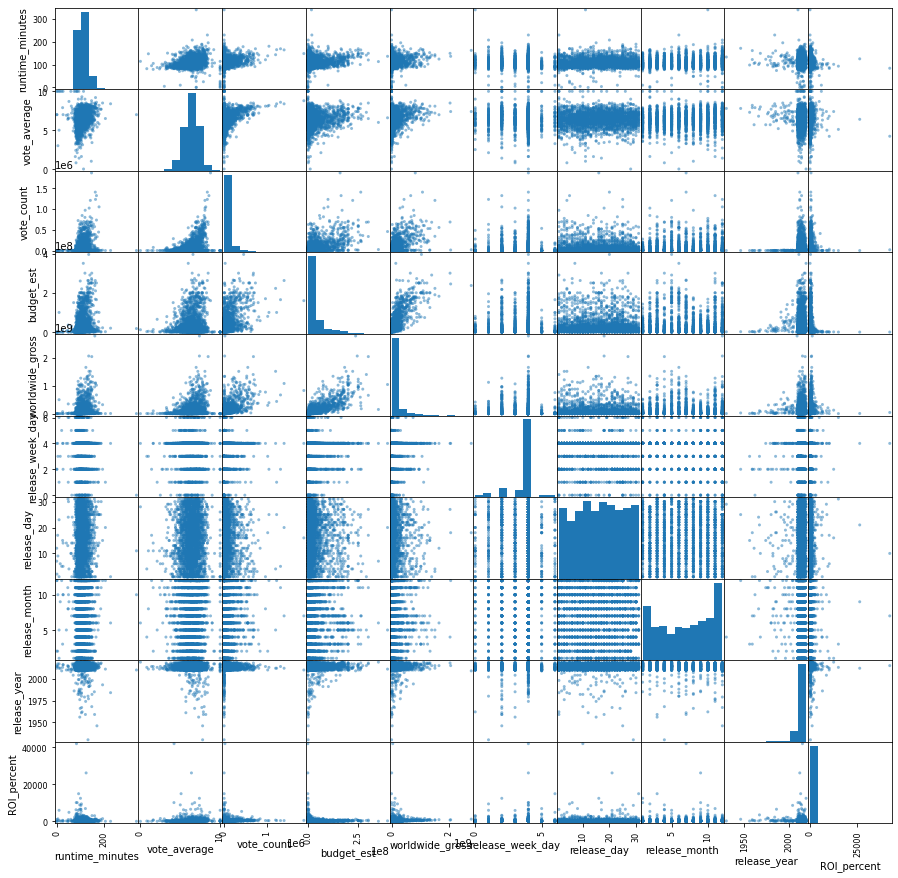

In [11]:
pd.plotting.scatter_matrix(movie_collection,figsize =(15,15));

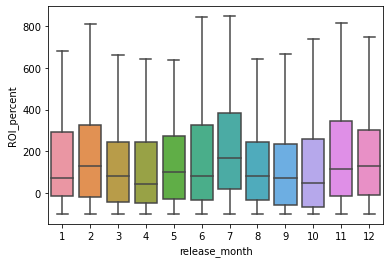

In [12]:
sns.boxplot(x='release_month',y='ROI_percent',data=movie_collection,showfliers = False);

I'm seeing that there are a decent number of movies in the collection that did not make money. It may be useful to look at characteristics of these movies, but lets look at the set of profitable movies.

In [13]:
profitable_collection = movie_collection.loc[movie_collection.ROI_percent > 0]

In [14]:
profitable_collection['budget_category'] = profitable_collection.budget_est.apply( lambda x: 'High' if x >= 200000001 else (
                                                                                             'Medium' if x >= 100000000 else (
                                                                                             'Low' if x >= 10000000 else
                                                                                             'Ultra Low' )))

<ipython-input-14-b63ee27f1d3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_collection['budget_category'] = profitable_collection.budget_est.apply( lambda x: 'High' if x >= 200000001 else (


In [15]:
profitable_collection['ROI_category'] = profitable_collection.ROI_percent.apply( lambda x: 'Over 1000%' if x >= 1000 else (
                                                                                          '700-1000%' if x >= 700 else (
                                                                                          '400-700%' if x >= 400 else (
                                                                                          '100-400%' if x >= 100 else  
                                                                                          'Less Than 100%' ))))

<ipython-input-15-3b6460673c00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_collection['ROI_category'] = profitable_collection.ROI_percent.apply( lambda x: 'Over 1000%' if x >= 1000 else (


In [16]:
profitable_collection.head()

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent,budget_category,ROI_category
0,tt0892769,How to Train Your Dragon,"['Fantasy', 'Adventure', 'Animation', 'Family']",98,8.095082,618909,165000000.0,4.948749e+08,4,26,3,2010,199.924167,Medium,100-400%
1,tt1228705,Iron Man 2,"['Adventure', 'Action', 'Science Fiction']",124,6.996308,670058,185000000.0,6.225449e+08,4,7,5,2010,236.510735,Medium,100-400%
2,tt1375666,Inception,"['Action', 'Science Fiction', 'Adventure']",148,8.794046,1863252,160000000.0,8.305287e+08,4,16,7,2010,419.080439,Medium,400-700%
3,tt0814255,Percy Jackson & the Olympians: The Lightning T...,"['Adventure', 'Fantasy', 'Family']",118,5.904995,169337,95000000.0,2.247740e+08,3,11,2,2010,136.604254,Low,100-400%
4,tt0435761,Toy Story 3,"['Animation', 'Family', 'Comedy']",103,8.292754,690558,200000000.0,1.067925e+09,3,17,6,2010,433.962306,Medium,400-700%


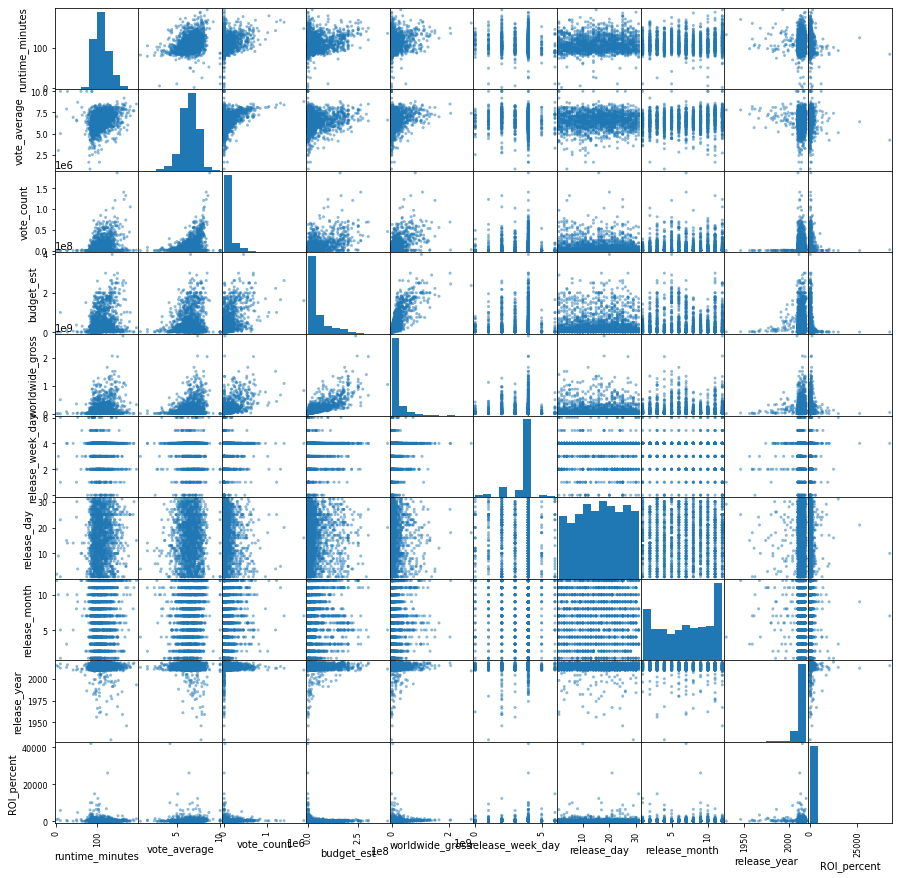

In [17]:
pd.plotting.scatter_matrix(profitable_collection,figsize =(15,15));

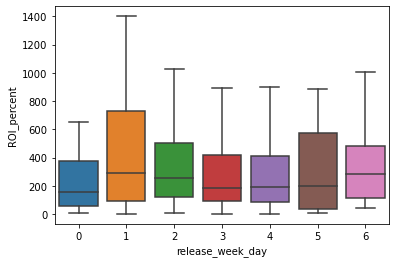

In [18]:
sns.boxplot(x='release_week_day',y='ROI_percent',data=profitable_collection,showfliers = False);

In [34]:
profitable_collection.groupby('ROI_category').count()

,tconst,Title,Genres,runtime_minutes,vote_average,vote_count,budget_est,worldwide_gross,release_week_day,release_day,release_month,release_year,ROI_percent,budget_category
ROI_category,,,,,,,,,,,,,,
100-400%,720,720,720,720,720,720,720,720,720,720,720,720,720,720
400-700%,215,215,215,215,215,215,215,215,215,215,215,215,215,215
700-1000%,82,82,82,82,82,82,82,82,82,82,82,82,82,82
Less Than 100%,450,450,450,450,450,450,450,450,450,450,450,450,450,450
Over 1000%,140,140,140,140,140,140,140,140,140,140,140,140,140,140


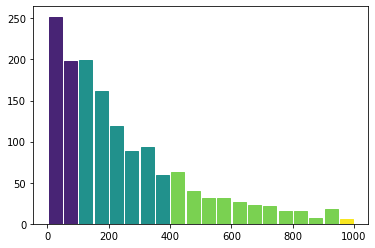

In [19]:
N, bins, patches = plt.hist(x = profitable_collection.ROI_percent,
                            bins = 20,range = (0,1000),rwidth=0.85)

cmap = plt.get_cmap('viridis')
clrs = [cmap(0.1),cmap(.5),cmap(0.8),cmap(.99)]
ranges = [ range(0,2), range(2,8),range(8,19),range(19,20)]

for r in ranges:
    for bar in r:
        patches[bar].set_color(clrs[ranges.index(r)])

(0.0, 1000.0)

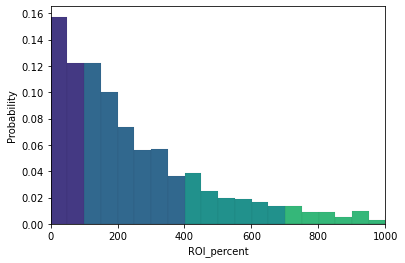

In [64]:
fig2,ax2 = plt.subplots()
pal = sns.color_palette('viridis',5)
sns.histplot(x='ROI_percent',data=profitable_collection, ax=ax2, binwidth = 50,
             stat = 'probability', hue='ROI_category',alpha=1,
             hue_order = ['Less Than 100%','100-400%','400-700%','700-1000%','Over 1000%'],
             palette=pal,legend=False);
ax2.set_xlim(0,1000)

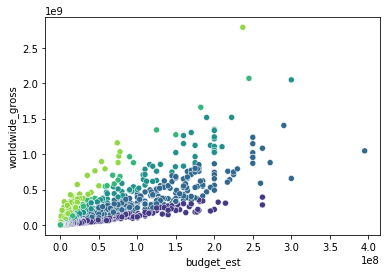

In [30]:
sns.scatterplot(x='budget_est',y='worldwide_gross',data=profitable_collection,
                hue='ROI_category',legend=False,
                hue_order = ['Less Than 100%','100-400%','400-700%','700-1000%','Over 1000%'],
                palette='viridis');

Okay, so here we are seeing most of the videos with ROI percents above 1000 (yellow) are on the low budget end of the spectrum, though there is a significant sample beween 500 (dark to med blue, roughly) and 1000 for budgets up to 200,000,000. It also looks like we could divide up the above plot into a few regions based on budget.

In [19]:
high_budget_profitable = profitable_collection.loc[profitable_collection.budget_est >= 200000001]
med_budget_profitable = profitable_collection.loc[(profitable_collection.budget_est <= 200000000) &
                                                 (profitable_collection.budget_est >= 100000000)]
low_budget_profitable = profitable_collection.loc[(profitable_collection.budget_est < 100000000) &
                                                 (profitable_collection.budget_est >= 10000000)]
ultralow_budget_profitable = profitable_collection.loc[profitable_collection.budget_est < 10000000]

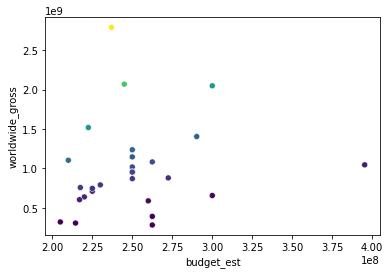

In [79]:
sns.scatterplot(x='budget_est',y='worldwide_gross',data=high_budget_profitable,
                c=high_budget_profitable.ROI_percent,vmin = 100, vmax=1000);

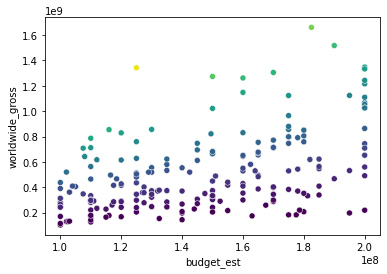

In [25]:
sns.scatterplot(x='budget_est',y='worldwide_gross',data=med_budget_profitable,
                c=med_budget_profitable.ROI_percent,vmin = 50,vmax=1000);

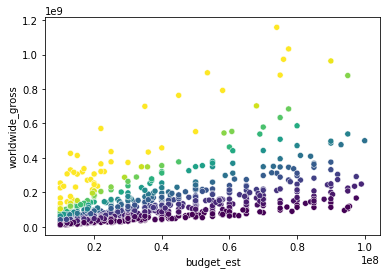

In [22]:
sns.scatterplot(x='budget_est',y='worldwide_gross',data=low_budget_profitable,
                c=low_budget_profitable.ROI_percent,vmin = 50,vmax=1000);

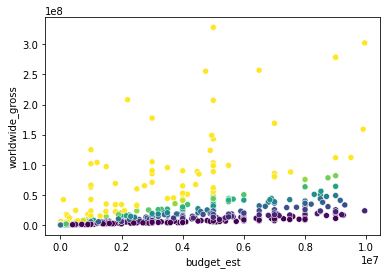

In [23]:
sns.scatterplot(x='budget_est',y='worldwide_gross',data=ultralow_budget_profitable,
                c=ultralow_budget_profitable.ROI_percent,vmin = 50,vmax=1000);

In [ ]:
sns.lmplot(x='budget_est',y='worldwide_gross',data=profitable_collection,
           palette='viridis',truncate=False,line_kws = {'color':'red'},
           lowess = True);

(100.0, 400.0)

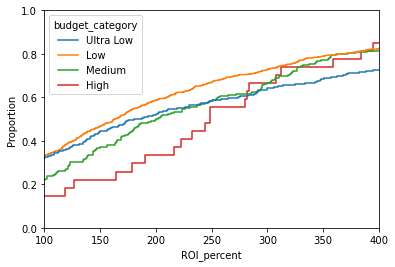

In [63]:
fig1, ax1 = plt.subplots()
sns.ecdfplot(data=profitable_collection.loc[(profitable_collection.ROI_percent > 0) &
                                            (profitable_collection.ROI_percent < 1000)],
             x='ROI_percent',hue = 'budget_category',
            hue_order = ['Ultra Low','Low','Medium','High'])
ax1.set_xlim(100,400)